# Property Price Prediction 

### Use regression analysis to predict the price of a propert

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('HousePrices.csv')

In [3]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(2073, 81)

In [5]:
df.drop(columns = ['Id'], axis = 1, inplace = True)

In [6]:
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.Alley.isnull().sum()

1944

In [8]:
df.PoolQC.isnull().sum()

2065

In [9]:
df.Fence.isnull().sum()

1669

In [10]:
df.MiscFeature.isnull().sum()

1993

In [11]:
df.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis = 1, inplace = True)

In [12]:
df1 = pd.concat([df.Property_Sale_Price, df.drop(columns='Property_Sale_Price', axis = 1)], axis = 1 )
df1.head()

,Property_Sale_Price,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,208500,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,181500,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,223500,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,140000,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,250000,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [13]:
# we will remove the independent features with correlation less than 0.05 to the dependent variable.

In [80]:
df.corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,Property_Sale_Price,CentralAir_Y
LotFrontage,1.000000,0.240528,0.101230,0.088630,0.094559,0.121076,0.117531,0.129897,0.104903,0.266189,...,0.133998,0.270708,0.204724,0.062945,0.254447,0.073800,0.097186,0.111869,0.268354,0.065761
LotArea,0.240528,1.000000,0.078232,-0.010551,0.017766,0.063975,0.043713,0.164989,0.000127,0.200794,...,0.055205,0.155519,0.211193,-0.021826,0.144898,0.121530,0.064376,0.062458,0.211572,0.048244
OverallQual,0.101230,0.078232,1.000000,0.335326,0.379579,0.282833,0.488133,0.163501,0.197844,0.354046,...,0.449659,0.272410,0.255236,0.363577,0.373203,0.155307,0.217044,0.045138,0.523553,0.208247
YearBuilt,0.088630,-0.010551,0.335326,1.000000,0.536129,0.262509,0.474613,0.207941,0.118779,0.329629,...,0.435274,0.080751,0.135165,0.689674,0.406962,0.180472,0.179935,0.005788,0.437662,0.311873
YearRemodAdd,0.094559,0.017766,0.379579,0.536129,1.000000,0.166082,0.542887,0.101401,0.198201,0.283802,...,0.587994,0.173802,0.106243,0.626138,0.336030,0.182932,0.221604,-0.009607,0.475565,0.274555
MasVnrArea,0.121076,0.063975,0.282833,0.262509,0.166082,1.000000,0.340507,0.237311,0.123720,0.345144,...,0.288035,0.274542,0.274723,0.237850,0.360821,0.123055,0.140592,0.002936,0.480394,0.130838
ExterQual,0.117531,0.043713,0.488133,0.474613,0.542887,0.340507,1.000000,0.195007,0.296843,0.475258,...,0.715058,0.285301,0.265153,0.529321,0.479865,0.194639,0.312977,0.035203,0.686049,0.210909
BsmtFinSF1,0.129897,0.164989,0.163501,0.207941,0.101401,0.237311,0.195007,1.000000,-0.508612,0.485476,...,0.212226,0.010932,0.220218,0.135961,0.258896,0.207229,0.107593,0.099504,0.373276,0.171855
BsmtUnfSF,0.104903,0.000127,0.197844,0.118779,0.198201,0.123720,0.296843,-0.508612,1.000000,0.435593,...,0.236145,0.249399,0.076822,0.191803,0.199145,-0.004537,0.147045,-0.023034,0.231903,0.037324
TotalBsmtSF,0.266189,0.200794,0.354046,0.329629,0.283802,0.345144,0.475258,0.485476,0.435593,1.000000,...,0.446174,0.252806,0.324280,0.310080,0.468849,0.239018,0.264615,0.089796,0.618828,0.226965


These columns have very less correlation with the dependent feature.

Dwell_Type	-0.017399	
OverallCond	-0.049926
BsmtFinSF2	-0.029042
LowQualFinSF	-0.046975
BsmtHalfBath	-0.026010
MiscVal	-0.020430	
MoSold	0.041053
YrSold	0.001740
KitchenAbvGr	0.006330
EnclosedPorch	-0.002113	
3SsnPorch	0.037639	
ScreenPorch	0.019810	

In [15]:
df.drop(columns=['Dwell_Type', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'MiscVal', 'MoSold', 'YrSold'], axis = 1, inplace = True)

In [16]:
df.drop(columns=['KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis = 1, inplace = True)

In [77]:
df.drop(columns='ExterCond', axis = 1, inplace = True)

In [79]:
df.drop(columns='GarageCars', axis = 1, inplace=True)
# The correlation between GarageCars and GarageArea is 0.88, multicolinearity. So anyone of the feature is enough to predict the price

In [17]:
df.shape

(2073, 63)

In [40]:
for col in df.columns:
    print(col,"\t",df[col].dtype,'\t',df[col].isnull().sum())

Zone_Class 	 object 	 0
LotFrontage 	 float64 	 0
LotArea 	 int64 	 0
Property_Shape 	 object 	 0
LandContour 	 object 	 0
LotConfig 	 object 	 0
LandSlope 	 object 	 0
Condition1 	 object 	 0
Dwelling_Type 	 object 	 0
HouseStyle 	 object 	 0
OverallQual 	 int64 	 0
YearBuilt 	 int64 	 0
YearRemodAdd 	 int64 	 0
RoofStyle 	 object 	 0
RoofMatl 	 object 	 0
Exterior1st 	 object 	 0
Exterior2nd 	 object 	 0
MasVnrType 	 object 	 0
MasVnrArea 	 float64 	 0
ExterQual 	 object 	 0
ExterCond 	 object 	 0
Foundation 	 object 	 0
BsmtQual 	 object 	 0
BsmtCond 	 object 	 0
BsmtExposure 	 object 	 0
BsmtFinType1 	 object 	 0
BsmtFinSF1 	 int64 	 0
BsmtFinType2 	 object 	 0
BsmtUnfSF 	 int64 	 0
TotalBsmtSF 	 int64 	 0
Heating 	 object 	 0
HeatingQC 	 object 	 0
CentralAir 	 object 	 0
Electrical 	 object 	 0
1stFlrSF 	 int64 	 0
2ndFlrSF 	 int64 	 0
GrLivArea 	 int64 	 0
BsmtFullBath 	 int64 	 0
FullBath 	 int64 	 0
HalfBath 	 int64 	 0
BedroomAbvGr 	 int64 	 0
KitchenQual 	 object 	 0
TotRmsA

In [20]:
df.shape

(2073, 63)

### Filling missing values

In [21]:

col = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for name in col:
    df[name].fillna(df[name].mean(), inplace = True)

In [22]:
for name in col:
    print(df[name].isnull().sum())

0
0
0


In [23]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode, inplace = True)

In [24]:
for col in df.columns:
    if df[col].dtype =='object':
        print(df[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [25]:
# Thus we have handled the missing values by
#1) Replacing with mean for int datatype features
#2) Replacing with mode for object datatype features

In [26]:
df.describe(include = 'object')

,Zone_Class,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,...,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073
unique,5,2,4,4,2,5,3,25,9,8,...,6,4,7,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1611,2063,1300,1854,2070,1481,1958,317,1794,2054,...,1901,1043,1937,1252,857,1870,1885,1913,1797,1695


In [27]:
df.Road_Type.value_counts()

Pave    2063
Grvl      10
Name: Road_Type, dtype: int64

In [28]:
# Only 10 values are Grvl out of 2073 rows. 
# Droping this feature will be a wise idea
df.drop(columns ='Road_Type', axis = 1, inplace = True)

In [29]:
df.Utilities.value_counts()

AllPub    2070
NoSeWa       3
Name: Utilities, dtype: int64

In [30]:
# Only 3 values are NoSeWa l out of 2073 rows. 
# Droping this feature will be a wise idea
df.drop(columns ='Utilities', axis = 1, inplace = True)

In [31]:
# Similarly condition2 , It cannot give any insight. 
df.drop(columns ='Condition2', axis = 1, inplace = True)

In [32]:
# We can group/merge the values in certain features together to simplify the model
df.Zone_Class.value_counts()

RL         1611
RM          324
FV          102
RH           22
C (all)      14
Name: Zone_Class, dtype: int64

In [33]:
df.Zone_Class.replace('C','NR', inplace = True) # NR - Non residential
df.Zone_Class.replace('C (all)','NR', inplace = True)

In [34]:
# unable to group neigbourhood, so I decide to drop it. 
df.drop(columns= 'Neighborhood', axis = 1, inplace= True)

In [35]:
df.Condition1.replace(['RRAn','RRNn'],'NrRR', inplace = True) #NrRR - near rail road
df.Condition1.replace('PosA','PosN', inplace = True) 
df.Condition1.replace('RRAe','RRNe', inplace = True) 

In [36]:
df.Dwelling_Type.replace(['TwnhsE','TwnhsI'],'Twnhs', inplace = True)

In [37]:
df.HouseStyle.value_counts()

1Story    1036
2Story     638
1.5Fin     214
SLvl        89
SFoyer      54
1.5Unf      16
2.5Unf      16
2.5Fin      10
Name: HouseStyle, dtype: int64

In [38]:
df.HouseStyle.replace(['1Story','1.5Fin', '1.5Unf'], 'lessThan2', inplace = True)
df.HouseStyle.replace(['2Story','2.5Fin', '2.5Unf'], 'greaterThanEq2', inplace=True)

In [41]:
df.drop(columns=['Exterior1st', 'Exterior2nd'], axis = 1, inplace = True)

In [44]:
df.ExterQual.replace(['Ex','Gd','TA', 'Fa', 'Po'], [5,4,3,2,1], inplace = True )

In [46]:
df.ExterCond.replace(['Ex','Gd','TA', 'Fa', 'Po'], [5,4,3,2,1], inplace = True)

In [48]:
df.BsmtQual.replace(['Ex','Gd','TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0], inplace = True)

In [49]:
df.BsmtCond.replace(['Ex','Gd','TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0], inplace = True)

In [50]:
df.BsmtExposure.replace(['Ex','Av','Mn', 'No', 'Na'], [4,3,2,1,0], inplace = True)

In [58]:
df.HeatingQC.replace(['Ex','Gd','TA', 'Fa', 'Po'], [5,4,3,2,1], inplace = True)

In [64]:
df = pd.get_dummies( data = df,columns=['CentralAir'], drop_first= True)

In [67]:
df.KitchenQual.replace(['Ex','Gd','TA', 'Fa', 'Po'], [5,4,3,2,1], inplace = True)

In [68]:
df.drop(columns='Functional', axis = 1, inplace = True)

In [71]:
df.Fireplaces.replace(['Ex','Gd','TA', 'Fa', 'Po','NA'], [5,4,3,2,1,0], inplace = True)

In [74]:
df.GarageQual.replace(['Ex','Gd','TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0], inplace = True)

In [143]:
df.GarageCond.replace(['Ex','Gd','TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0], inplace = True)

<AxesSubplot:>

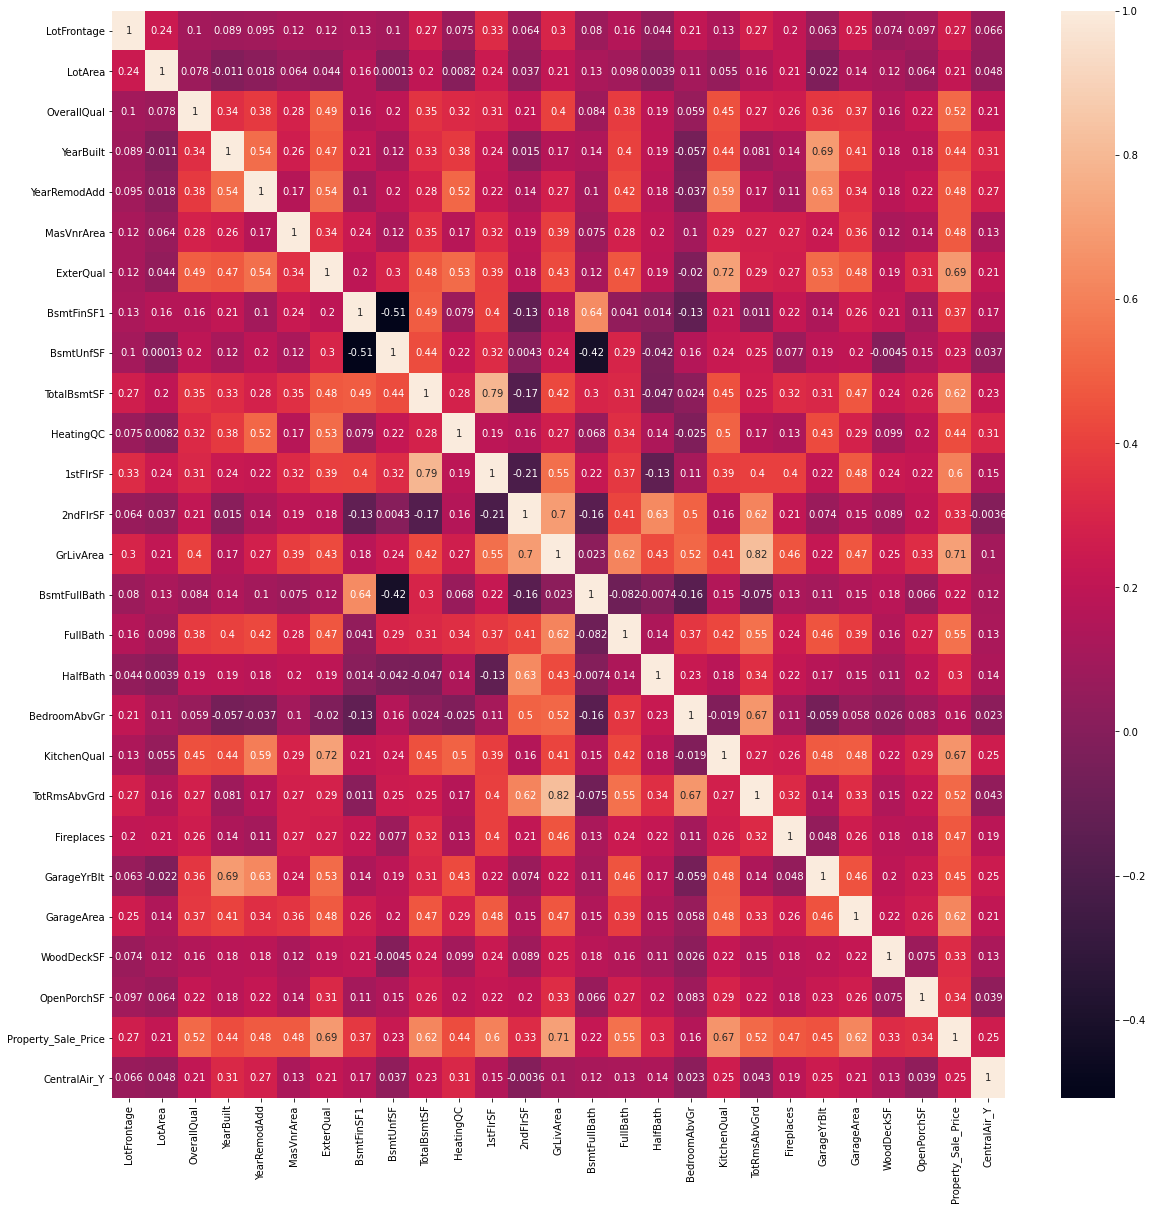

In [95]:
#Finding correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [91]:
df.drop(columns='PoolArea', axis=1, inplace=True)

In [99]:
cat = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)

In [103]:
cat

['Zone_Class',
 'Property_Shape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Dwelling_Type',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [104]:
df = pd.get_dummies(data =df, columns=['Zone_Class',
 'Property_Shape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Dwelling_Type',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtCond'])

In [108]:
df = pd.get_dummies(data =df, columns=['BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',])

In [111]:
df = pd.get_dummies(data =df, columns=[ 'Heating',
 'Electrical'] )

In [116]:
df = pd.get_dummies(data =df, columns=['SaleCondition'] )

In [117]:
df = pd.get_dummies(data =df, columns=['SaleType'] )

In [122]:
df = pd.get_dummies(data =df, columns=['PavedDrive'] )

In [145]:
for col in df.columns:
    if ((df[col].dtype == 'object')):
        print(col)

GarageType
GarageFinish
GarageQual
GarageCond


In [152]:
df.drop(columns=['GarageType',
'GarageFinish',
'GarageQual',
'GarageCond'], axis = 1, inplace=True)

<AxesSubplot:>

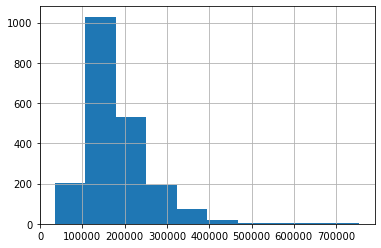

In [250]:
df.Property_Sale_Price.hist()

<AxesSubplot:>

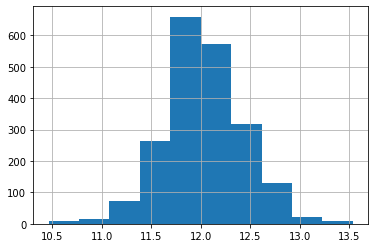

In [251]:
price_log = np.log(df.Property_Sale_Price)
price_log.hist()

#### Log(Price) is normally distributed - bell curve
#### It is better to use log(price) 

In [ ]:
#import sys
#sys.setrecursionlimit(10000)

### Model

In [271]:

df_exp = df.drop(columns='Property_Sale_Price')
x=df_exp.drop(columns =["log_price"],axis=1)
y=df_exp[["log_price"]]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=2)
model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
print(model.score(x_test, y_test))

0.9007129186185796
0.8878171069369069


### Score Improvement


In [269]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df_exp.drop(["log_price"], axis = 1)
X = scaler.fit_transform(x)
Y = df_exp[['log_price']]
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

model.fit(x_train, y_train)
print(model.score(x_train,y_train))
print(model.score(x_test, y_test))

0.8993674171166277
-5239459897219531.0


MinMax Scaler is not useful here. 
We can try standard Scaler

In [275]:
# Standardization
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

model.fit(x_train, y_train)  
print(model.score(x_train,y_train))
print(model.score(x_test, y_test))

0.9006904404491929
-7.033353847296665e+22


As we can see Standardization also isnt helpful.

# Result

Train Score = 0.9007129186185796
Test Score = 0.8878171069369069